# Homework 1

This is Homework 1 for CS 489. Please solve the problems below to the best of your ability. Note that your submission must be a file upload to Canvas and be a Jupyter Notebook file (`.ipynb`).

**ALL CODE YOU WRITE MUST BE YOUR OWN.** You may use course materials, slides, and concepts, but any code you write must be of your own creation. If you do reference or make use of outside source, please make sure they are cited appropriately. A strict citation style is not needed, and a URL is sufficient, but please acknowledge any external materials.

To make sure that plots are properly embedded in your notebook, please use the `%matplotlib inline` Jupyter magic. You may also include any additional packages that you require.

Point totals will be awarded as indicated for each problem or sub-section. Note that throughout, explanatory comments are _required_, and partial credit may be earned even for solutions that do not fully implement the problem as stated.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy.interpolate import interp2d

import statistics
import math
from scipy.stats import norm

# Incldue other packages you need here

# Problem 1 [15 points]
In the space below, please list your group members for the final project (groups must consist of 3-4 members). Also list a tentative topic and dataset that you are interested in working on. Note that the topic and/or dataset can change! If you have specific questions or need inspiration for what to work on, please reach out to the course instructor.

Your group mates, topic, and dataset go here!

**My group members are Suhwan Bae, Stacey Lai, and Nicholas Manasewitsch.

Topic: World Hospital Rankings

Dataset: http://www.https://www.kaggle.com/datasets/alitaqi000/world-hospital-ranking-2023**

${\color{red} \text{Good! As we move forward, we can make the topic more precise. 15/15}}$

# Problem 2 [25 points]

## Part 2.a [15 points]
Write your own function for computing a histogram given a one-dimensional Python list or NumPy array of data, and a desired number of bins.

In [2]:
def compute_histogram(data, nbins=10):
  dmin = min(data)   # finds min of data
  dmax = max(data)   # finds max of data

  # Finds bin width
  bwid = (dmax - dmin)/nbins

  # Finds bin edge by starting at our data minimum
  #   - range(nbins + 1) makes sequence 0 - nbins
  #   - dmin + i * bwid for... calculates position of
  #     each bin edge.
  bedg = [dmin + i * bwid for i in range(nbins + 1)]

  # creates a list of 0 elements the size of the number of bins
  bcount = [0] * nbins

  # Calculates the bin for a given data point
  for value in data:  # iterates through data
    bini = int((value-dmin) / bwid)   #Finds bin index
    if bini == nbins:
      bini -=1.  # data is assigns to the last bin
    bcount[int(bini)] += 1   # finds the bin count

  #plots histogram using plt.bar (to avoid using .hist())
  plt.bar(bedg[:-1], bcount, width=bwid, align='edge')
  plt.title('My Histogram')
  plt.xlabel('Bins')
  plt.ylabel('Frequency')
  plt.show()


${\color{red} \text{Looks good! 15/15}}$

## Part 2.b [10 points]
Show that it produces a similar output to `np.histogram` given the sample of input data in `histogram_data.txt` (included on the assignment page in Canvas).

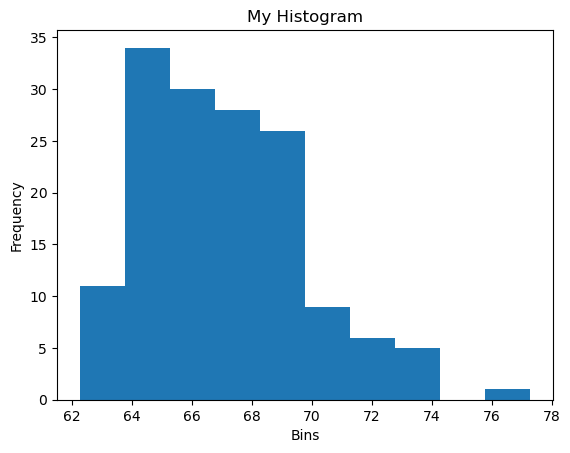

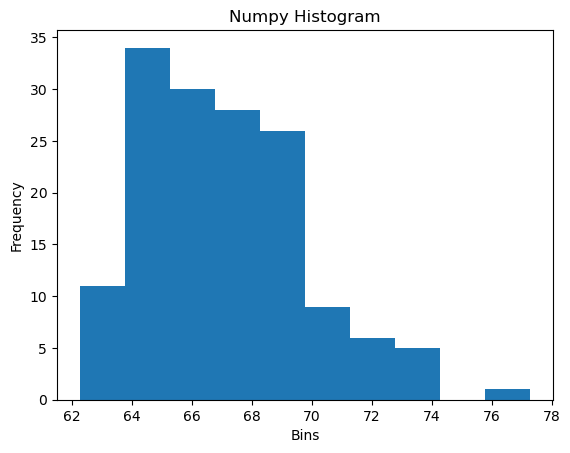

In [3]:
#gets data from sample input data
histogram_data = np.genfromtxt("histogram_data.txt")

# Calls above histogram function made above with sample data.
# Histogram is printed in that function,(function is void)
my_histogram = compute_histogram(histogram_data, nbins=10)

# uses np.histogram to calculate and "make" histogram
numpy_histogram, bedg = np.histogram(histogram_data, bins = 10)

# Displays numpy histogram.  Discovered "plt.stairs" func in the
# url link bellow
# https://www.geeksforgeeks.org/matplotlib-pyplot-step-function-in-python/
plt.stairs(numpy_histogram, bedg, fill = True)
plt.title('Numpy Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()


${\color{red} \text{Nice comparison! 10/10}}$

# Problem 3 [25 points]
We are going to practice linear interpolation in 2 dimensions. We talked about interpolating in 1-d in class, and this is a natural step on the way up to $n$-dimensional interpolation.

## Problem 3.a [10 points]
Write your own function for linearly interpolating data in two dimensions. This function should take as arguments:
- Desired $x$-coordinate(s)
- Desired $y$-coordinate(s)
- Input 1-d grid of $x$-coordinates for which the function is defined
- Input 1-d grid of $y$-coordinates for which the function is defined
- Input 2-d grid of function values where the function is defined/evaluated
As output, your function should return:
- The linearly interpolated value for a $z$-coordinate that corresponds to the input $x$- and $y$-values.

In [4]:
def interp2d(x, y, xg, yg, zg):
    # Got help w algorith https://en.wikipedia.org/wiki/Bilinear_interpolation
    # Gets indeces of our grid points
    # .searchsorted = binary search on grids
    i = np.searchsorted(xg, x)
    j = np.searchsorted(yg, y)

    #Creates the needed coordinates using indexes
    x1, y1 = xg[i-1], yg[j-1]
    x2, y2 = xg[i], yg[j]

    # We obtain four points to use for interpolation
    Q11 = zg[j-1, i-1]
    Q12 = zg[j, i-1]
    Q21 = zg[j-1, i]
    Q22 = zg[j, i]

    # Linear interpolation
    result = (Q11 * (x2 - x) * (y2 - y) +
           Q21 * (x - x1) * (y2 - y) +
           Q12 * (x2 - x) * (y - y1) +
           Q22 * (x - x1) * (y - y1)) / ((x2 - x1) * (y2 - y1))

    return result


${\color{red} \text{Nice work! 10/10}}$

## Problem 3.b [10 points]
Read in the $x$-values, $y$-values, and function ($z$) values defined in `interp_xvals.txt`, `interp_yvals.txt`, and `interp_zvals.txt`. Compute the interpolated value for $x = 0.13$ and $y = 2.77$ based on your function defined above.

In [5]:
# reads from files
xvals = np.genfromtxt("interp_xvals.txt")
yvals = np.genfromtxt("interp_yvals.txt")
zvals = np.genfromtxt("interp_zvals.txt")

#calls function w needed parameters
result = interp2d(0.13, 2.77, xvals, yvals, zvals)
print(result)

-0.012597303027239236


${\color{red} \text{Yep, looks good. 10/10}}$

## Problem 3.c [5 points]
Plot the results of your interpolating function, as well as the results of `scipy.interpolate.interp2d` using `kind='linear'` over the region $x \in [0, 5]$ and $y \in [0, 3]$. You may use either a 3d plot, or a pseudo-color plot.

In [8]:
# 2d interpolation on our values
interf = interp2d(xvals, yvals, zvals, kind= 'linear')

# creates x and y arrays between 0-5 and 0-3 respectively.
xint = np.linspace(0.0, 5.0)
yint = np.linspace(0.0, 3.0)
# combines coordinates created above into a grid, 2darr
X,Y = np.meshgrid(xint, yint)
#z will be the interpolated vals of the grid points
Z = interf(xint, yint)

# used chatgpt to help with creating colorplot
# creating the color plot
plt.figure(figsize=(10, 6))  #initialize new plot w size
plt.pcolormesh(X, Y, Z, cmap='plasma')   # creating colorploy
plt.colorbar(label='Interpolated Value')  # adds colorbar

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Plot using scipy.interpolat.inter2d')
plt.show()

TypeError: interp2d() got an unexpected keyword argument 'kind'

${\color{red} \text{Unfortunately this doesn't work because you've also called your}}$
${\color{red} \text{function \texttt{interp2d}, which does not have a ``kind'' keyword.}}$
${\color{red} \text{argument. However, this goes most of the way toward making a plot. 3/5}}$

# Problem 4 [35 points]
We are going to analyze a sample dataset, and go through some typical analysis steps that might be done.

## Part 4.a [5 points]
Read in the dataset `particle_data.txt` These represent measurements of particle velocities from an experimental apparatus we have, in cm/s.

In [9]:
particle_data = np.genfromtxt("particle_data.txt")

${\color{red} \text{Good. 5/5}}$

## Part 4.b [5 points]
Compute the mean, standard deviation, and median of the dataset. Note that you should compute these quantities using **code that you write yourself** (the use of built-in Python functions is allowed), but you _may_ check your answers using functions available from NumPy.

In [10]:
def mean(data):
  # finds length of the data set
  length = 0
  # Iterates through data, adds 1 to length for every
  # data point.
  for i in data:
    length += 1
  #Iterates through data and adds each number
  # to total.
  total = 0
  for i in data:
    total += i

  mean = total / length   # finds mean

  return mean

def std(data):

  #finds length
  slen = 0
  for i in data:
    slen += 1
  # Get mean
  smean = mean(data)
  # Each data point gets subtracted by mean and
  # then squared
  diffsqr = []
  for x in data:
    diffsqr.append((x - smean) ** 2)
  # finds total of each(data- mean)^2
  meandiff = 0
  for i in diffsqr:
    meandiff += i
  # divides by length
  meandiff /= slen
  # takes the square root
  stddev = meandiff ** 0.5

  return stddev

def median(data):
  #finds length
  mlen = 0
  for i in data:
    mlen += 1

  # sort data
  data.sort()

  # find middle values
  if mlen % 2 == 0:   # checks if list is even
    mid1 = data[mlen // 2 - 1]  # finds middle value -1
    mid2 = data[mlen // 2]      # finds middle value
    med = (mid1 + mid2) /2      # finds average of the two
  else:
    med = sorted[mlen // 2]       # finds middle of data
  return med


print("Mean = ", mean(particle_data))
print("Standard Deviation = ", std(particle_data))
print("Median = ", median(particle_data))

Mean =  0.04848145822681183
Standard Deviation =  4.791711084406483
Median =  0.0020297949188772687


${\color{red} \text{Looks good! 5/5}}$

## Part 4.c [5 points]
Compute the PDF of the data. Make sure that it is normalized (i.e., that $\int \mathrm{d}x \; \mathrm{PDF}(x) = 1$). Make a plot of the PDF of the interval spanned by the data.

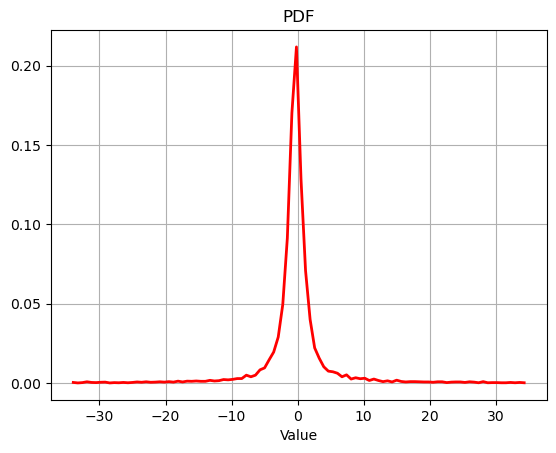

In [11]:
def calc_pdf(data):
  #got algorithm help from
  #https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

  nbins = 100   # num of bins

  # creates histogram from data and gets data
  # count = arr that represents freq of data in each bin
  # bins =  For the edges of the used bins
  count, bins= np.histogram(data, bins = nbins)

  # Finds pdf using histogram data
  pdf = count/sum(count)

  return bins, pdf

bins, pdf = calc_pdf(particle_data)

# Plots pdf
plt.plot(bins[:-1], pdf, 'r-', linewidth=2)
plt.xlabel('Value')
plt.title('PDF')
plt.grid(True)

plt.show()

${\color{red} \text{This is almost right. We also need to take the width of the bins}}$
${\color{red} \text{in account when computing the normalization. Another option is to}}$
${\color{red} \text{call np.histogram with density=True. Nice visualization. 4/5}}$

## Part 4.d [5 points]
Compute the CDF of the data. Again, it should be normalized (so that $\mathrm{CDF}(-\infty) = 0$ and $\mathrm{CDF}(+\infty) = 1$). Make a plot over the interval.

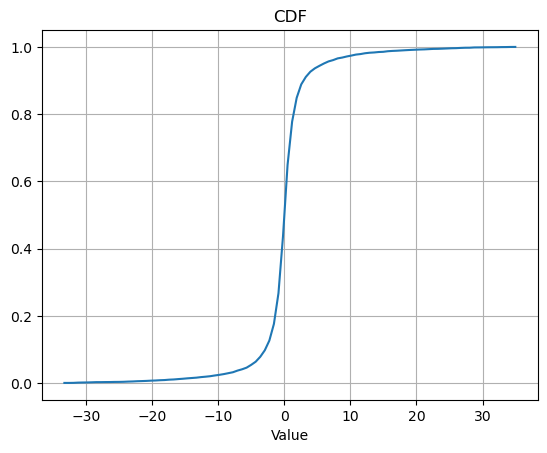

In [12]:
def calc_cdf(data):
  #got algorithm help from
  #https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

  # get length
  length = 0
  for i in data:
    length += 1

  # calls pdf function to get bins number used
  # in that function as well as the pdf
  bin, pdf = calc_pdf(data)

  # gets the bin
  count, bins = np.histogram(data, bin)

  # cumsum calculates cdf.  Returns cumulative sum of the
  # elements along the axis
  cdf = np.cumsum(pdf)

  return bins, cdf

bins, cdf = calc_cdf(particle_data)

# plots the cdf
plt.plot(bins[1:], cdf, label="CDF")
plt.xlabel('Value')
plt.title('CDF')
plt.grid(True)

plt.show()

${\color{red} \text{This is consistent with the normalization of the PDF above. 5/5}}$

## Part 4.e [5 points]
Compare the data with a Gaussian distribution with the same mean and standard deviation as the data. Plot the PDF/histogram of the data against the Gaussian model.

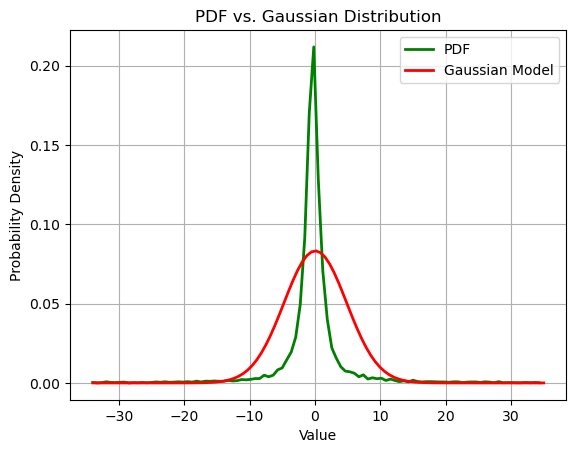

In [13]:
dmean = np.mean(particle_data)    # find mean of data
dstdev = np.std(particle_data)    # find standard deviation of data

bins, ppdf = calc_pdf(particle_data)   # calls pdf function

# Plots pdf
plt.plot(bins[:-1], ppdf, 'g-', linewidth=2, label='PDF')
plt.title('PDF')
plt.grid(True)
plt.legend()

# algorithm help from
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

#generates arr, 100 values evenly spaced
x = np.linspace(min(particle_data), max(particle_data), 100)
# norm refers to gaussian distribution.
#   - loc sets the mean, determins center of gaussian curve
#   - scale sets standard deviation, spread/ width or gaussian curve
pdf = norm.pdf(x, loc = dmean, scale = dstdev)

# Plot the Gaussian PDF
plt.plot(x, pdf, 'r', linewidth=2, label='Gaussian Model')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF vs. Gaussian Distribution')
plt.legend()


${\color{red} \text{Nice comparison! 5/5}}$

## Part 4.f [5 points]
Use the KS test to determine whether the data are consistent with a Gaussian distribution.

✨ EXTRA CREDIT ✨
If the data are not consistent with a Gaussian, can you find a distribution that is?

In [ ]:
result = kstest(...)

${\color{red} \text{Unfortunately I don't see anything here :(}}$
${\color{red} \text{In future assignments, please try something,}}$
${\color{red} \text{as I try to be as generous as possible with partial}}$
${\color{red} \text{credit. If there isn't anything written though, I can't}}$
${\color{red} \text{give credit. 0/5}}$

## Part 4.g [5 points]
Compute the (approximate) confidence intervals over which 68% and 95% of the data are distributed.

_Hint_: you can fine the, e.g., 68% confidence interval by finding the value $a$ such that $\mathrm{CDF}(\mu + a) - \mathrm{CDF}(\mu - a) \approx 0.68$, where $\mu$ is the mean of the data.

In [ ]:
cdf = calc_cdf(particle_data)

...

${\color{red} \text{Same comment as above re: partial credit. 0/5}}$

${\color{red} \text{Overall: 87/100}}$